# Imports and Data Setup:

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import os
import geoip2.database
import geoip2.errors
import geopy
from typing import Tuple
import maxminddb

In [2]:
# CONSTS
GEOIP_PATH = "db/country_asn_2024-01-25.mmdb"
SCAN_PATH = "csvs/scan_2024-01-23_15-11.csv.gz"
ENR_SCAN_PATH = "csvs/enriched_scan_ipinfo.csv.gz"
ENR_FLTR_SCAN_PATH = "csvs/enriched_nocloudflare_scan_ipinfo.csv.gz"
PLOT_PATH = "plots"
NO_CLOUDFLARE_PATH = "plots/nocloudflare"
# INIT
os.makedirs(PLOT_PATH, exist_ok=True)
os.makedirs(NO_CLOUDFLARE_PATH, exist_ok=True)
import df_logic
df_logic.init_geo(GEOIP_PATH)
import plots

In [4]:
# call to create enriched dataframe
df_logic.create_enriched_data(SCAN_PATH, ENR_SCAN_PATH, truncate=True)

truncating enriched CSV file
now creating enriched CSV file in chunks
chunk 0 completed
chunk 1 completed
chunk 2 completed
chunk 3 completed
chunk 4 completed
chunk 5 completed
done creating enriched CSV file


# Test section:

In [4]:
#tests
with maxminddb.open_database("db/country_asn_2024-01-25.mmdb") as reader:
    print(reader.get("142.250.195.206"))

{'as_domain': 'google.com', 'as_name': 'Google LLC', 'asn': 'AS15169', 'continent': 'AS', 'continent_name': 'Asia', 'country': 'IN', 'country_name': 'India'}


# Creation of Plots:

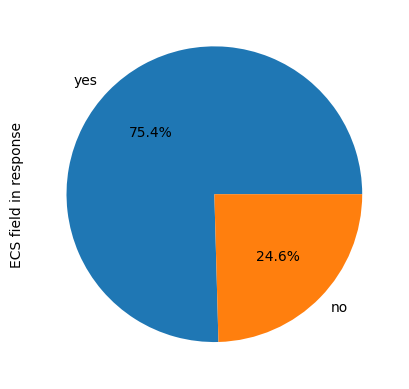

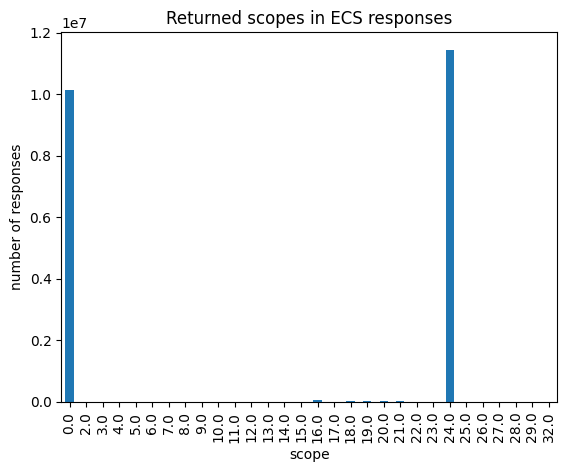

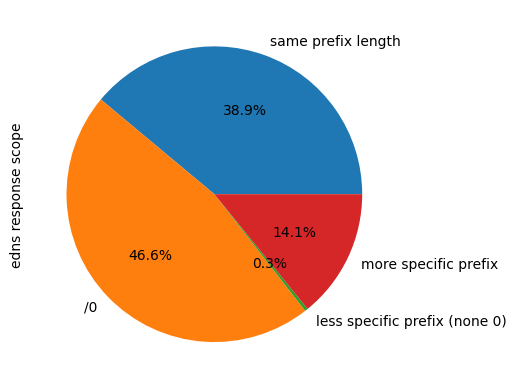

In [3]:
# the OGs~~~
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["returned-subnet"]) # this wont work with load_csv?
plots.plot_ecs_support_percentage(df, PLOT_PATH)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["scope","timestamp"])
plots.plot_returned_scopes(df, PLOT_PATH)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["subnet","scope", "subnet-scope"])
plots.plot_returned_scope_comparison(df, PLOT_PATH)

## Plots showing the distribution of matching continent codes in the responses and requested subnets per domain:

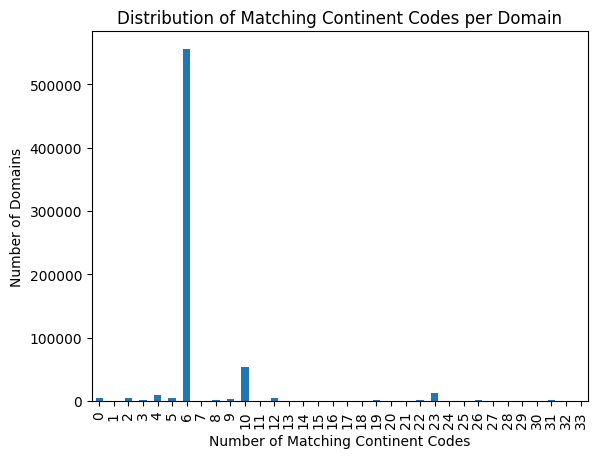

In [ ]:
# continent distribution (ecs)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_matches(df, PLOT_PATH)

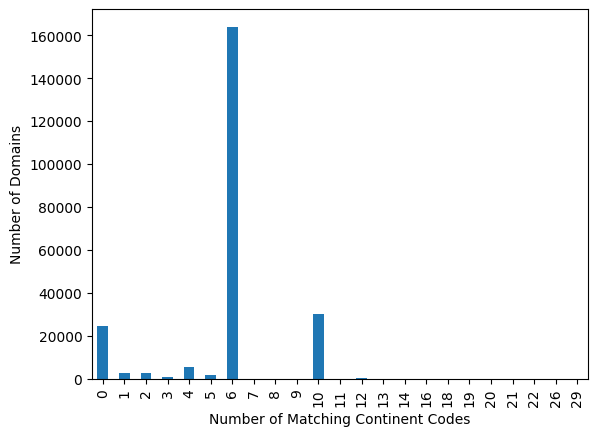

In [ ]:
# continent distribution (no ecs)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_matches(df, PLOT_PATH, ecs=False)

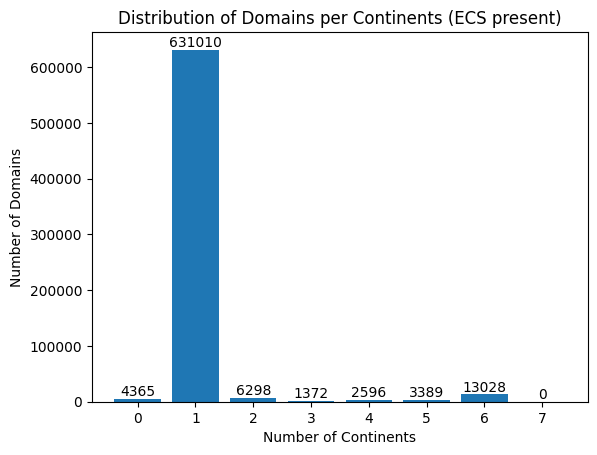

In [3]:
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_distribution(df, PLOT_PATH, ecs=True)

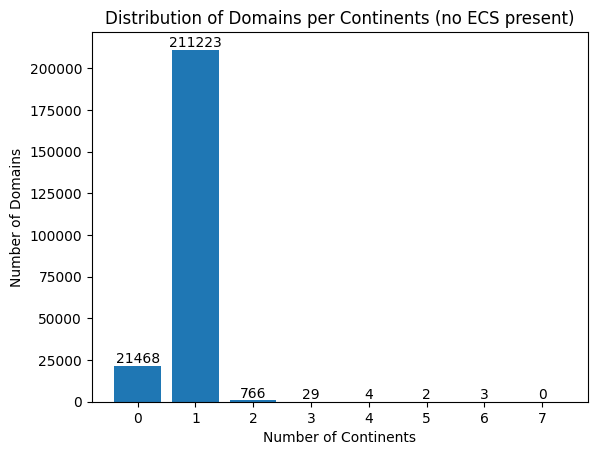

In [4]:
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_distribution(df, PLOT_PATH, ecs=False)

## Plots for mapping responses to countries:

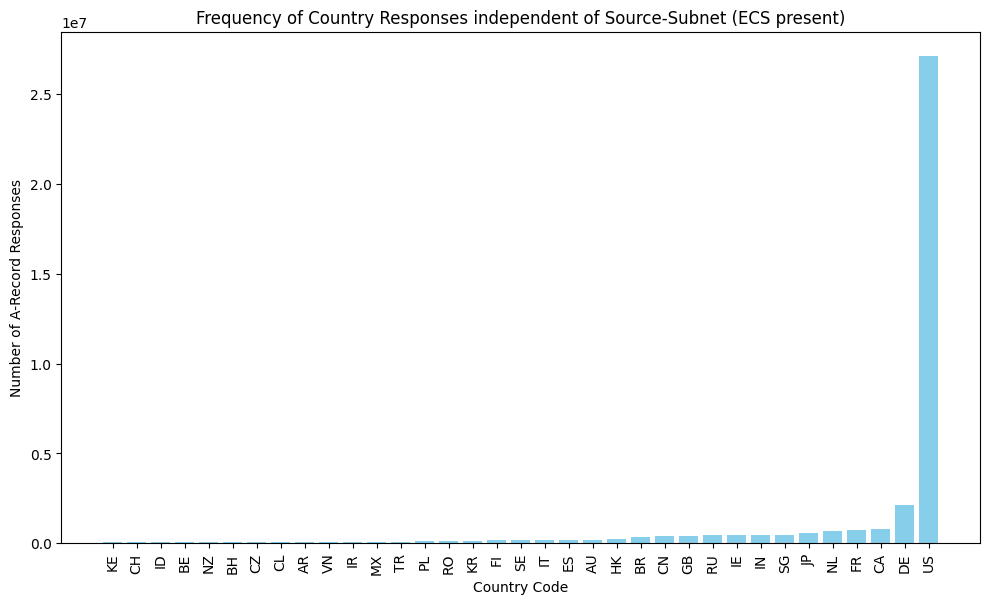

In [3]:
# mapping received responses to countries (ecs)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_country_responses(df, PLOT_PATH)

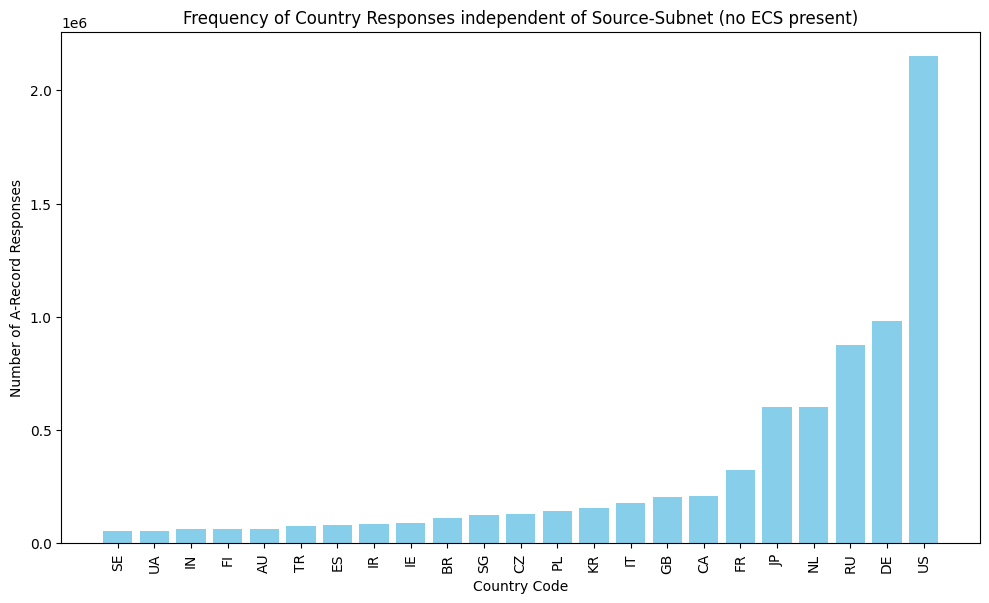

In [4]:
# mapping received responses to countries (no ecs)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_country_responses(df, PLOT_PATH, ecs=False)

## Plots regarding ASNs:

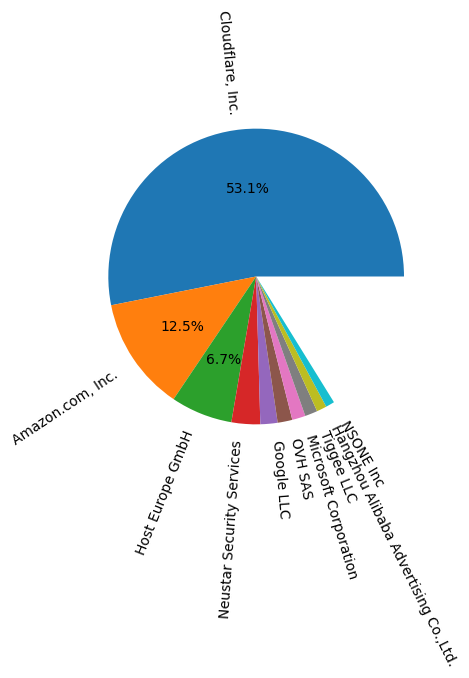

<Figure size 1000x600 with 0 Axes>

D:\Projekte\Python\edns_subnet_measurement\analysis\plots.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_ecs_df['scope'] = 1


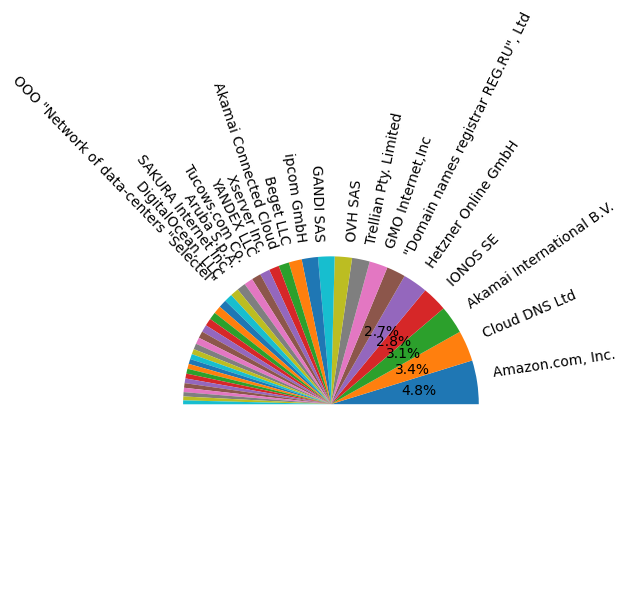

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["scope", "ns-as"])
plots.plot_as_distribution_graph(df, PLOT_PATH)
plots.plot_as_distribution_graph_non_ecs(df, PLOT_PATH)

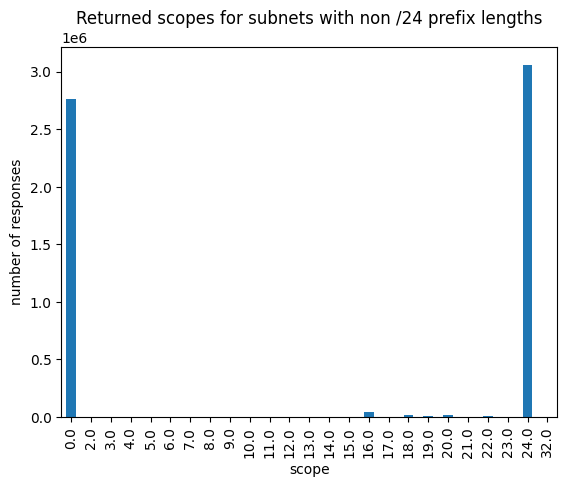

In [5]:
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["scope", "timestamp", "subnet-scope"])
plots.plot_returned_scopes_non_24(df, PLOT_PATH)

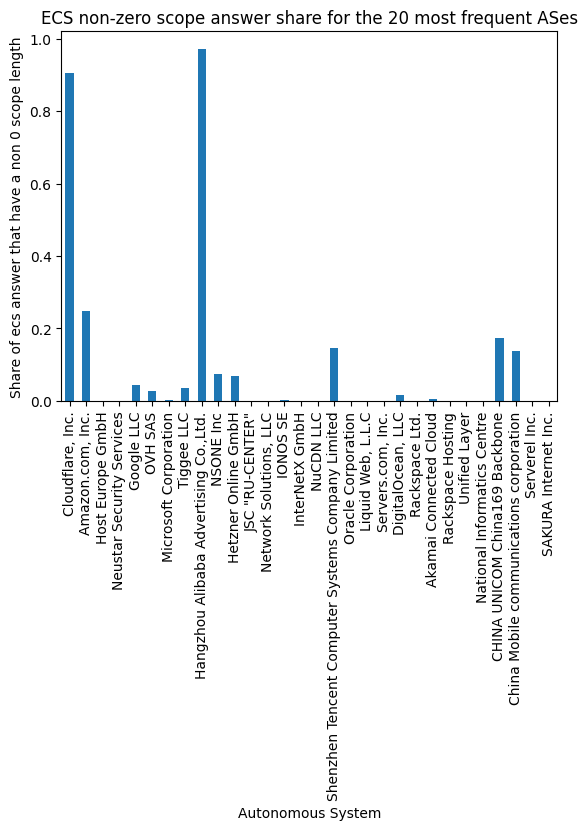

In [6]:
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["scope", "ns-as"])
plots.plot_non_zero_scope_answer_share(df, PLOT_PATH)

## Removal of cloudflare

In [3]:
df_logic.drop_cloudflare_csv(ENR_SCAN_PATH, ENR_FLTR_SCAN_PATH)

### countries

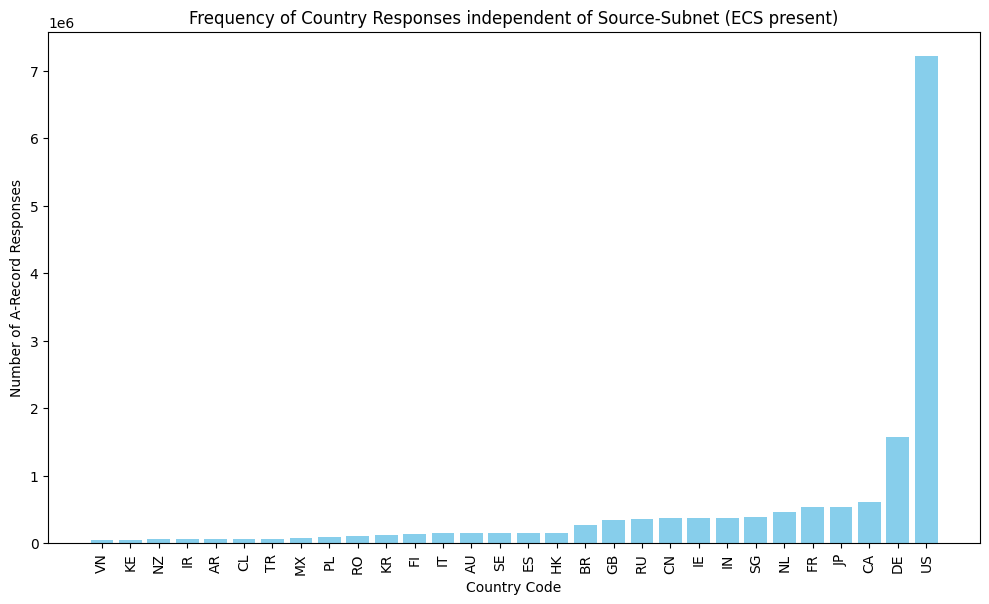

In [5]:
# mapping received responses to countries (ecs)
df = df_logic.load_enriched_csv(ENR_FLTR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_country_responses(df, NO_CLOUDFLARE_PATH)

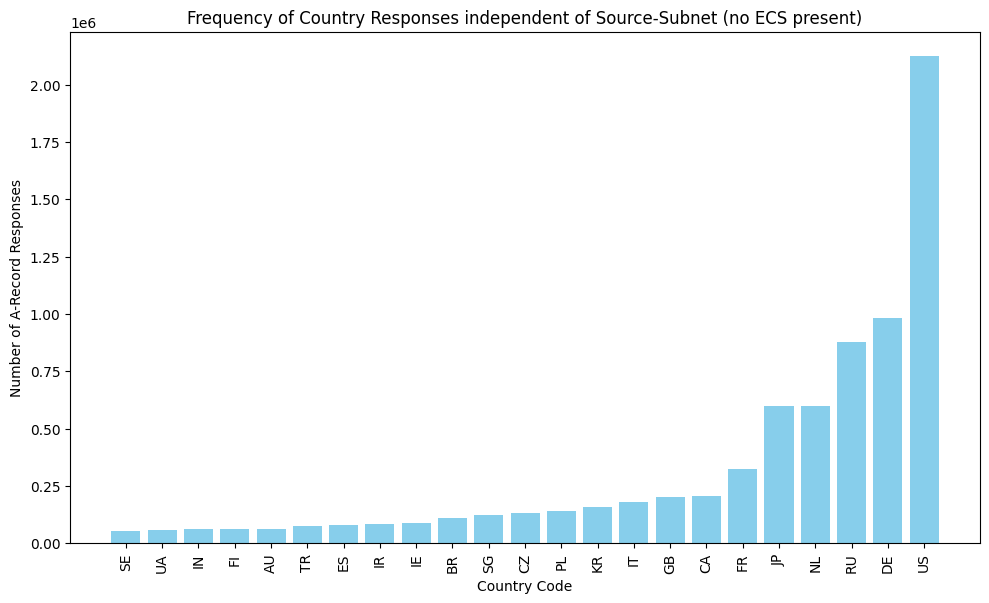

In [6]:
# mapping received responses to countries (no ecs)
df = df_logic.load_enriched_csv(ENR_FLTR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_country_responses(df, NO_CLOUDFLARE_PATH, ecs=False)

### continents

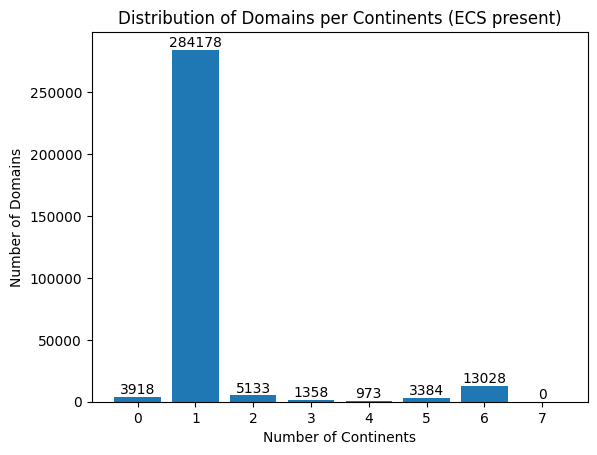

In [5]:
df = df_logic.load_enriched_csv(ENR_FLTR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_distribution(df, NO_CLOUDFLARE_PATH, ecs=True)

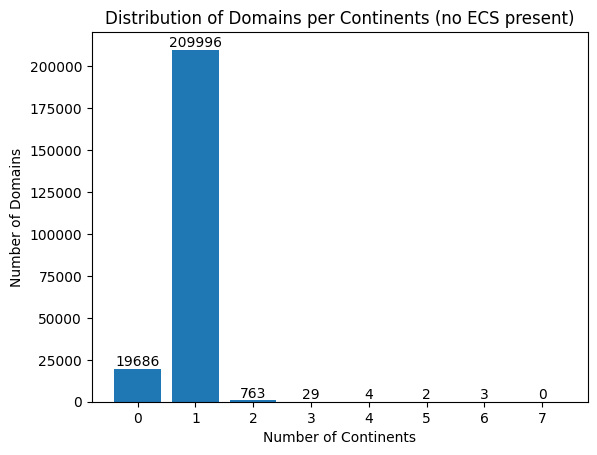

In [6]:
df = df_logic.load_enriched_csv(ENR_FLTR_SCAN_PATH, usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_distribution(df, NO_CLOUDFLARE_PATH, ecs=False)